# Question 3

In [17]:
# Setup and define function for parsing
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [18]:
# Find pdf files in a directory and process its content
import os
import glob

txtfiles = []
inpath = 'resume/'
outpath = 'out/'
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))

INFO: processing file = Thien_Le_Resume.pdf
INFO: - in = resume/Thien_Le_Resume.pdf, out = out/Thien_Le_Resume.txt
INFO: - reading file = resume/Thien_Le_Resume.pdf
INFO: - writing file = out/Thien_Le_Resume.txt
INFO: processing file = Rowen_Burney_Resume.pdf
INFO: - in = resume/Rowen_Burney_Resume.pdf, out = out/Rowen_Burney_Resume.txt
INFO: - reading file = resume/Rowen_Burney_Resume.pdf
INFO: - writing file = out/Rowen_Burney_Resume.txt
INFO: processing file = Resume - Duayne Wright Jr.pdf
INFO: - in = resume/Resume - Duayne Wright Jr.pdf, out = out/Resume - Duayne Wright Jr.txt
INFO: - reading file = resume/Resume - Duayne Wright Jr.pdf
INFO: - writing file = out/Resume - Duayne Wright Jr.txt
INFO: processing file = Jacob T. Frierson Resume.pdf
INFO: - in = resume/Jacob T. Frierson Resume.pdf, out = out/Jacob T. Frierson Resume.txt
INFO: - reading file = resume/Jacob T. Frierson Resume.pdf
INFO: - writing file = out/Jacob T. Frierson Resume.txt
INFO: processing file = Belcher__Tayl

In [19]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() 

# Resume Exercise - Programming: Word Processing

## 1

In [20]:
# Get content in all files into one string 
file = 'out/JohnAydin-2024-Resume.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
#content_as_str = " ".join(sorted(set(content), key=content.index))
# Has duplicates
my_content_as_str = " ".join(content)

## 2

<Axes: xlabel='word'>

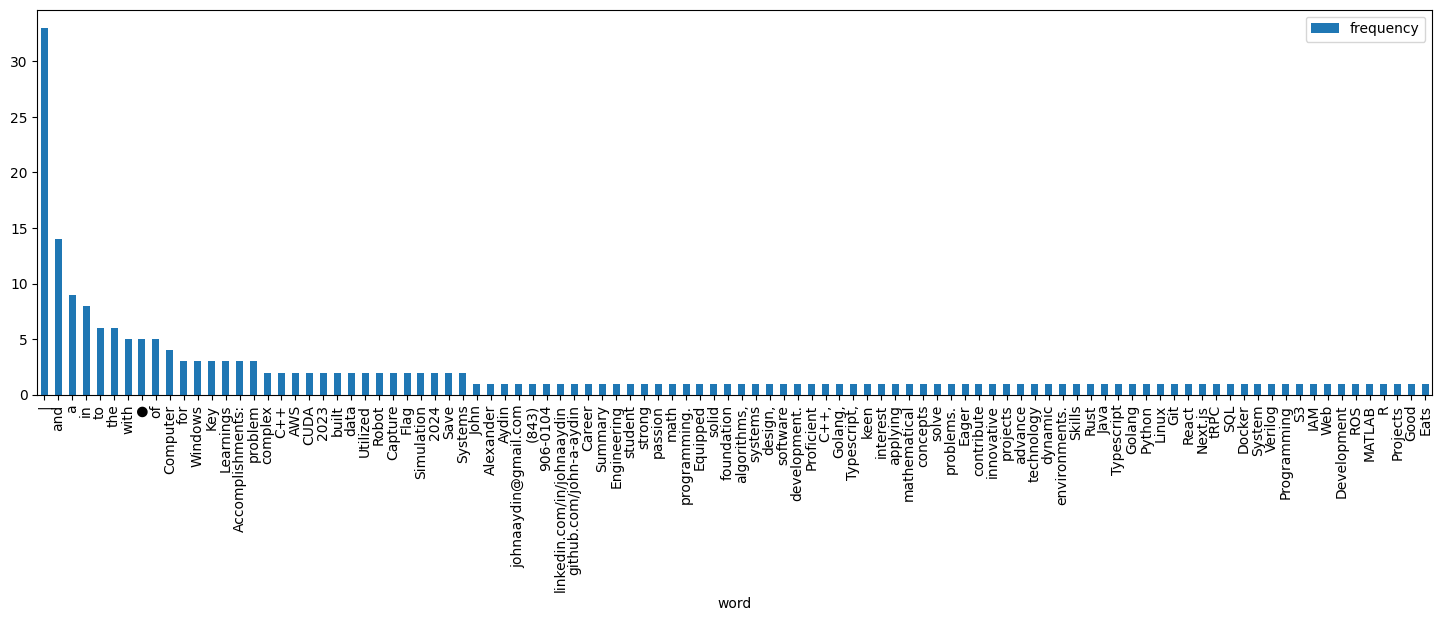

In [21]:
import pandas as pd
from collections import Counter
cnt = Counter(my_content_as_str.split())
top100 = cnt.most_common(100)
df = pd.DataFrame(top100, columns=['word', 'frequency'])
df.plot(kind='bar', x='word', figsize=(18, 5))

## 3-5

<Axes: xlabel='word'>

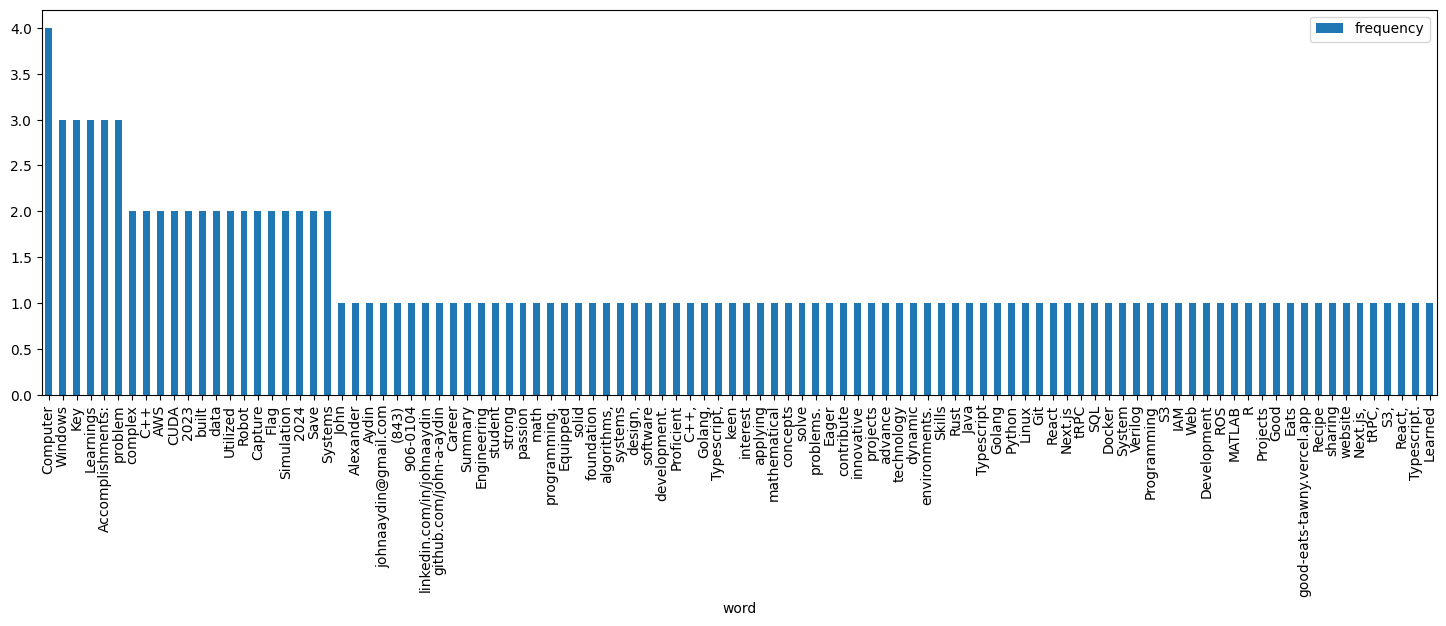

In [22]:
ignore = ['|', 'and', 'a', 'in', 'to', 'the', 'with', '●', 'of', 'for']
for word in list(cnt):
    if word in ignore:
        del cnt[word]
top100 = cnt.most_common(100)
df = pd.DataFrame(top100, columns=['word', 'frequency'])
df.plot(kind='bar', x='word', figsize=(18, 5))

## 6

The frequencies are much lower and fairly evenly distributed with most only appering once. This is probalbly because I try fit as many key words as I can in my resume while not sounding repetative.

# Resume Exercise - Programming: Word Tag Cloud

## Task 1

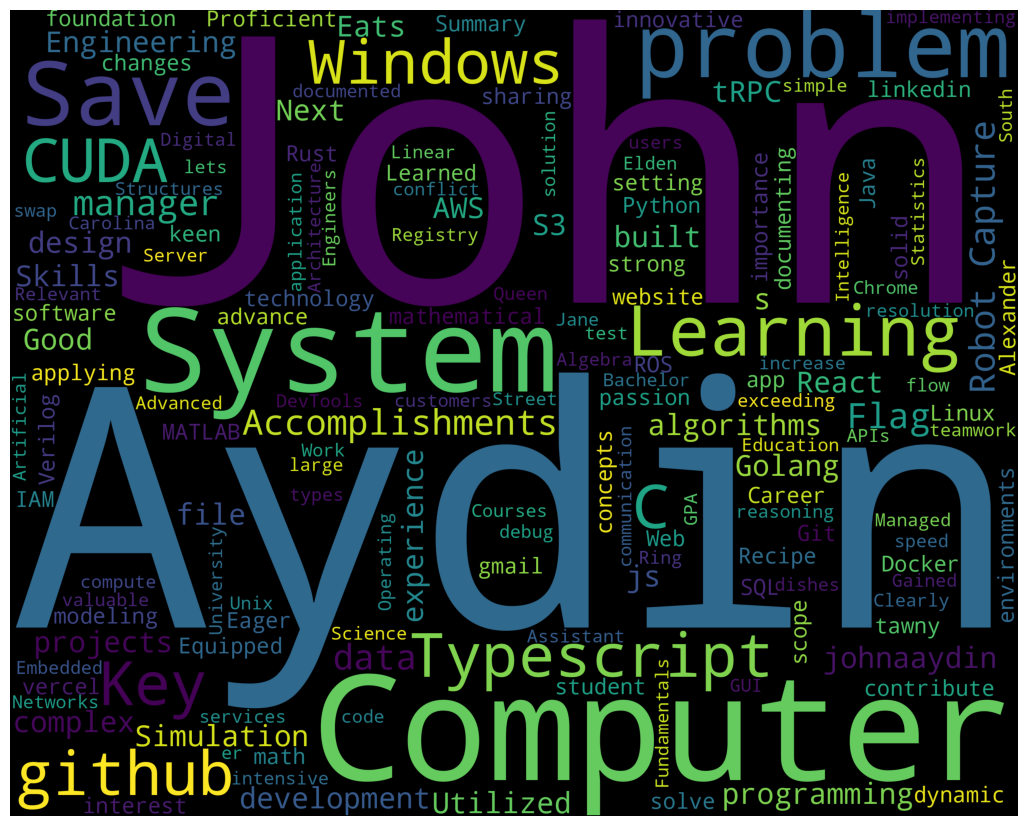

In [23]:
# Now do word tag cloud
wordcloud_draw(my_content_as_str.split())

## Task 2

In [24]:
# Get content in all files into one string 
pathFilesToUse = 'out/'

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    file_handle = open(file, 'r')
    content = str( file_handle.read()).split()
    #content_as_str = " ".join(sorted(set(content), key=content.index))
    # Has duplicates
    content_as_str = " ".join(content)
    # All together
    all_content = all_content + content_as_str
    #all_content.append(content)
    count = count + 1
    file_handle.close()

print('INFO: processed total files = ' + str(count))

file = out/Resume_Kolipaka,Pranavi.txt
file = out/August 2024 Ryan Karbowniczak Resume.txt
file = out/Thien_Le_Resume.txt
file = out/Resume(4-2-2024).txt
file = out/JoshuaKolbuszResume.txt
file = out/Rowen_Burney_Resume.txt
file = out/Jacob T. Frierson Resume.txt
file = out/Resume_Nafisa_Mehtaj.txt
file = out/Résumé Zak Elguindi.txt
file = out/Murphy_Keenan_resume_copy.txt
file = out/AndyWaters-Resume2024 - 08.22.24.txt
file = out/BCS Resume.txt
file = out/Ritvik_G.txt
file = out/JohnAydin-2024-Resume.txt
file = out/Resume_Protik_Nag.txt
file = out/Belcher__Taylor_Resume (3).txt
file = out/tylerbeasley_resume.txt
file = out/Resume - Duayne Wright Jr.txt
file = out/Dudley Hallie MSBA Resume final June 2024.txt
file = out/Nayeem Mohammad.txt
file = out/CS Resume.txt
file = out/Khan Waleed Resume.txt
file = out/Resume_Burkholder,Eric.txt
file = out/Resume - Eli Bryson.txt
file = out/resume-nicholas-miklaucic.txt
file = out/TrevorSeestedt_Resume.txt
file = out/MalikSiddResume2024.txt
file 

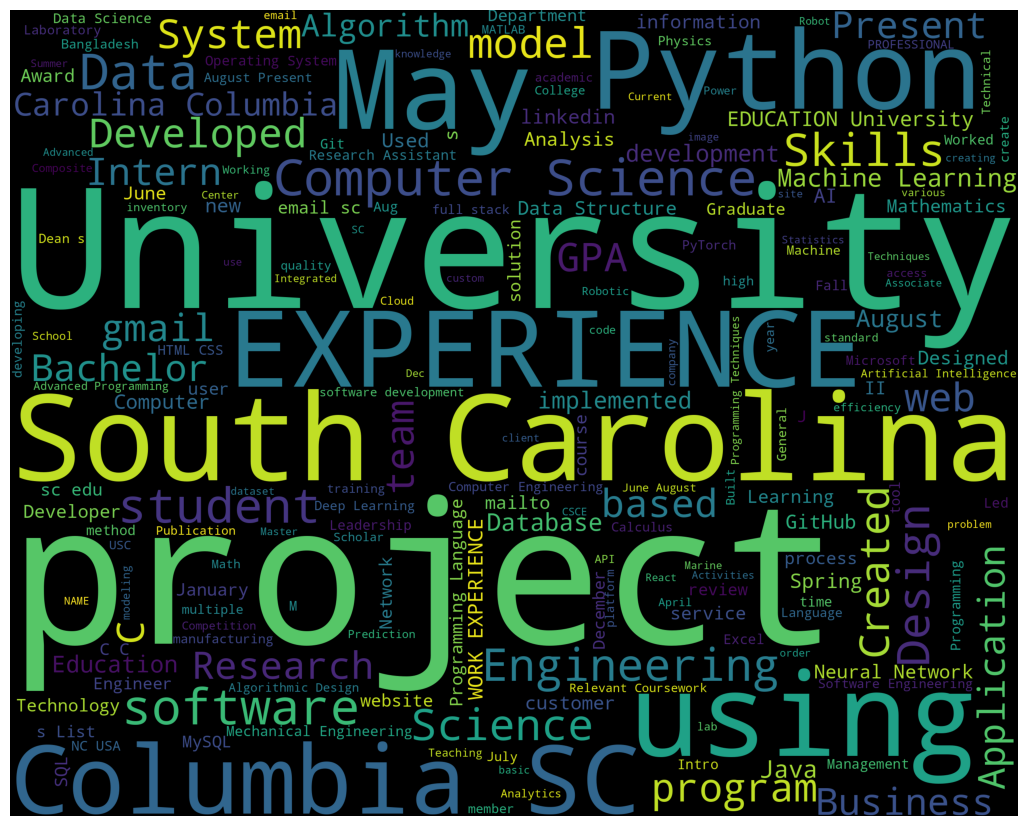

In [25]:
# Now do word tag cloud
wordcloud_draw(all_content.split())

## Observation

The coolest thing to me is seeing my name be the most frequent word in my word cloud since all of my socials include my name in their url.
Another thing I noticed is that in my word cloud you can see the individual technologies that I put on my resume, but when looking at the whole class, everyone's unique experiences are drowned out by general words like technology or development. It's also interesting to see that enough people mentioned SQL and Git on their resume for it to show on the class's word cloud.